# LeNet-5 en Keras con dataset MNIST

In [16]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import os
import pandas as pd
import tensorflow as tf
from tensorflow import keras

In [2]:
 (x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data(path="mnist.npz")

11493376/11490434 [==============================] - 0s 0us/step


In [15]:
from tensorflow.keras import layers
from tensorflow.keras import models

model = models.Sequential()

model.add(keras.layers.Conv2D(filters = 20,kernel_size = (5, 5),padding = "same",input_shape = (28, 28, 1),activation = "relu"))
model.add(keras.layers.MaxPooling2D( pool_size = (2, 2), strides = 2))

model.add(keras.layers.Conv2D(filters = 50,kernel_size = (5, 5),padding = "same",activation = "relu" ))
model.add(keras.layers.MaxPooling2D(pool_size = (2, 2),strides = 2))

model.add(keras.layers.Flatten())

model.add(keras.layers.Dense(500,activation = "relu"))
model.add(keras.layers.Dense(10,activation="softmax"))

model.compile(loss = "categorical_crossentropy", optimizer = keras.optimizers.SGD(learning_rate=1e-6), metrics = ["accuracy"])

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 28, 28, 20)        520       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 14, 20)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 14, 14, 50)        25050     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 7, 7, 50)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 2450)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 500)               1225500   
_________________________________________________________________
dense_3 (Dense)              (None, 10)               

Epoch 1/10
1875/1875 [==============================] - 5s 3ms/step - loss: 8.3951 - accuracy: 0.2602
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 3.3228 - accuracy: 0.5157
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 2.2589 - accuracy: 0.6300
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 1.7807 - accuracy: 0.6919
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 1.5064 - accuracy: 0.7310
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 1.3260 - accuracy: 0.7577
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 1.1969 - accuracy: 0.7778
Epoch 8/10
1875/1875 [==============================] - 5s 3ms/step - loss: 1.0989 - accuracy: 0.7930
Epoch 9/10
1875/1875 [==============================] - 5s 3ms/step - loss: 1.0210 - accuracy: 0.8055
Epoch 10/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.957

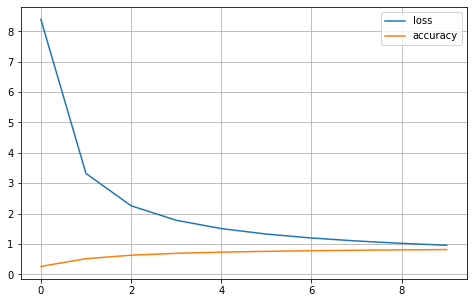

In [17]:
history = model.fit( x_train.reshape(-1, 28, 28, 1), Y_train, batch_size = 32, epochs = 10,verbose = 1)

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca()
plt.show()

In [18]:
ev = model.evaluate(x_test.reshape(-1, 28, 28, 1),Y_test)
print("Accuracy: ", ev[1])

313/313 [==============================] - 1s 2ms/step - loss: 0.9245 - accuracy: 0.8243
Accuracy:  0.8242999911308289
